**MachineLearning OLA Assignment**


QUESTION 1:

Define Problem Statement and perform Exploratory Data Analysis (10 points)

Definition of problem (as per given problem statement with additional views) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection,
 statistical summary.

Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

Bivariate Analysis (Relationships between important variables)

Illustrate the insights based on EDA Comments on range of attributes, outliers of various attributes. Comments on the distribution of the variables and relationship between them Comments for each univariate and bivariate plots


# Ans 1a :

## Define Problem Statement :

### Objective:
To predict driver attrition at Ola by analyzing driver demographic, performance, and tenure data. Attrition prediction will help Ola develop strategies for retention, optimize recruitment efforts, and reduce churn-related costs.

### Key Challenges:

* High churn rates among drivers.
* Balancing the cost of acquiring new drivers vs. retaining existing drivers.
* Identifying at-risk drivers early using historical data. Goals:




Perform Exploratory Data Analysis (EDA) to understand the dataset's structure, attributes, and distributions.

Engineer features to create meaningful predictors for the attrition model.

Develop a predictive model for driver attrition.

Evaluate model performance and derive actionable insights.



### DATA PREPARATION:

Import the Libraries:

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:

# Data Manipulation and Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from typing import Tuple, List

# Scikit-learn Preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

# Scikit-learn Model Selection and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    mean_squared_error,
    r2_score
)

# Scikit-learn Linear and Ensemble Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier
)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# Additional Libraries
import xgboost as xgb




df = pd.read_csv("/content/drive/MyDrive/Machinelearning_OLA/ola_driver_scaler.csv")

In [46]:
df

,,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,2381060,2
1,1,02-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,-665480,2
2,2,03-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,03-11-2019,1,1,0,2
3,3,11-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1
4,4,12-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08-01-2020,2788,30.0,0.0,C27,2,70254,06-08-2020,NaN,2,2,740280,3
19100,19100,09-01-2020,2788,30.0,0.0,C27,2,70254,06-08-2020,NaN,2,2,448370,3
19101,19101,10-01-2020,2788,30.0,0.0,C27,2,70254,06-08-2020,NaN,2,2,0,2
19102,19102,11-01-2020,2788,30.0,0.0,C27,2,70254,06-08-2020,NaN,2,2,200420,2


In [47]:
df.head()

,,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,2381060,2
1,1,02-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,NaN,1,1,-665480,2
2,2,03-01-2019,1,28.0,0.0,C23,2,57387,24-12-2018,03-11-2019,1,1,0,2
3,3,11-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1
4,4,12-01-2020,2,31.0,0.0,C7,2,67016,11-06-2020,NaN,2,2,0,1


### Check the Data


Shape of the data:


In [48]:
print(df.shape)

(19104, 14)


Data types of all attributes:


In [51]:
print(df.dtypes)

                          int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object


In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0                         19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None


Conversion of Categorical Attributes:


In [53]:
Categorical_columns = ['Gender','City','Education_Level' , 'Joining Designation','Grade']
for col in Categorical_columns:
  df[col] = df[col].astype('category')



In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0                         19104 non-null  int64   
 1   MMM-YY                19104 non-null  object  
 2   Driver_ID             19104 non-null  int64   
 3   Age                   19043 non-null  float64 
 4   Gender                19052 non-null  category
 5   City                  19104 non-null  category
 6   Education_Level       19104 non-null  category
 7   Income                19104 non-null  int64   
 8   Dateofjoining         19104 non-null  object  
 9   LastWorkingDate       1616 non-null   object  
 10  Joining Designation   19104 non-null  category
 11  Grade                 19104 non-null  category
 12  Total Business Value  19104 non-null  int64   
 13  Quarterly Rating      19104 non-null  int64   
dtypes: category(5), float64(1), int64(5), object(3)
memory

Missing Values Detection:

In [55]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Age                   61
Gender                52
LastWorkingDate    17488
dtype: int64


Finding Duplicates:

In [56]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows : {duplicates}")

Number of duplicate rows : 0


Summary Statistics:


In [57]:
print(df.describe())

                        Driver_ID           Age         Income  \
count  19104.000000  19104.000000  19043.000000   19104.000000   
mean    9551.500000   1415.591133     34.668435   65652.025126   
std     5514.994107    810.705321      6.257912   30914.515344   
min        0.000000      1.000000     21.000000   10747.000000   
25%     4775.750000    710.000000     30.000000   42383.000000   
50%     9551.500000   1417.000000     34.000000   60087.000000   
75%    14327.250000   2137.000000     39.000000   83969.000000   
max    19103.000000   2788.000000     58.000000  188418.000000   

       Total Business Value  Quarterly Rating  
count          1.910400e+04      19104.000000  
mean           5.716621e+05          2.008899  
std            1.128312e+06          1.009832  
min           -6.000000e+06          1.000000  
25%            0.000000e+00          1.000000  
50%            2.500000e+05          2.000000  
75%            6.997000e+05          3.000000  
max            3.3747

**2. Data Cleaning:**



Convert date columns to datetime


In [58]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'],errors= 'coerce', infer_datetime_format= True)
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'],errors = 'coerce', infer_datetime_format= True)
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'],errors = 'coerce', infer_datetime_format= True)
print(df[['MMM-YY', 'Dateofjoining', 'LastWorkingDate']].isnull().sum())


MMM-YY                 0
Dateofjoining          0
LastWorkingDate    18536
dtype: int64


**Univariate Analysis:**

Continuous Variables Distribution Plots:




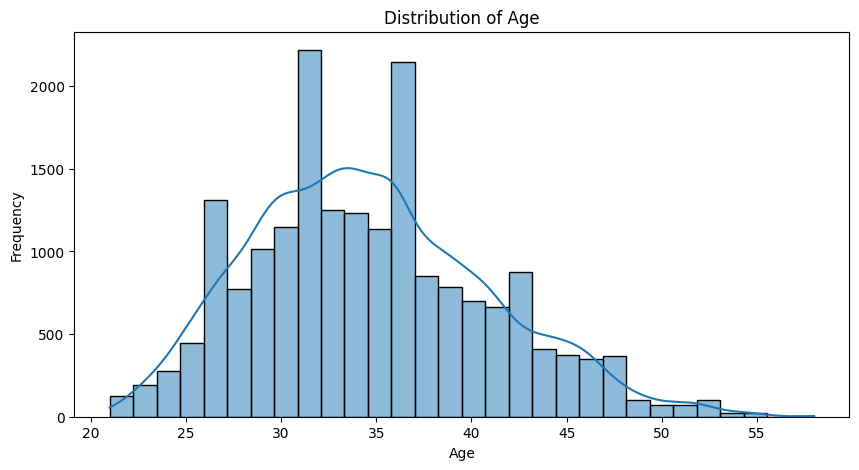

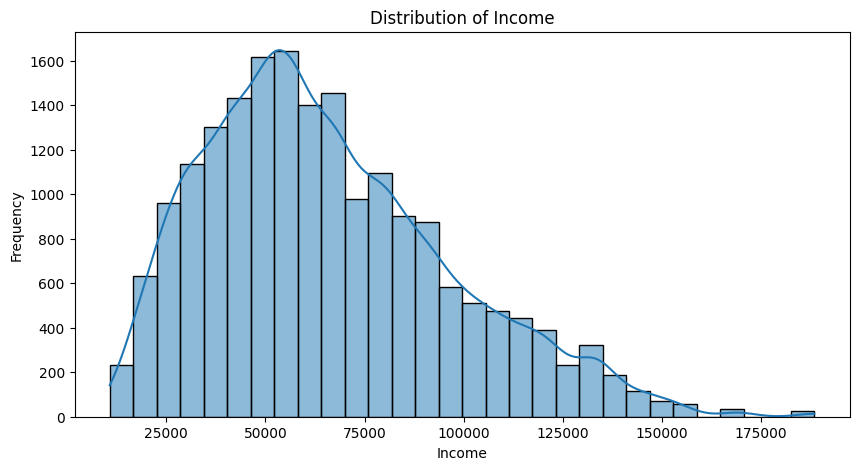

In [59]:
Continuous_vars = ['Age' , 'Income']
for vars in Continuous_vars:
  plt.figure(figsize=(10, 5))
  sns.histplot(df[vars], bins=30, kde=True)
  plt.title(f'Distribution of {vars}')
  plt.xlabel(vars)
  plt.ylabel('Frequency')
  plt.show()


Categorical Variables BarplotsCountplots :

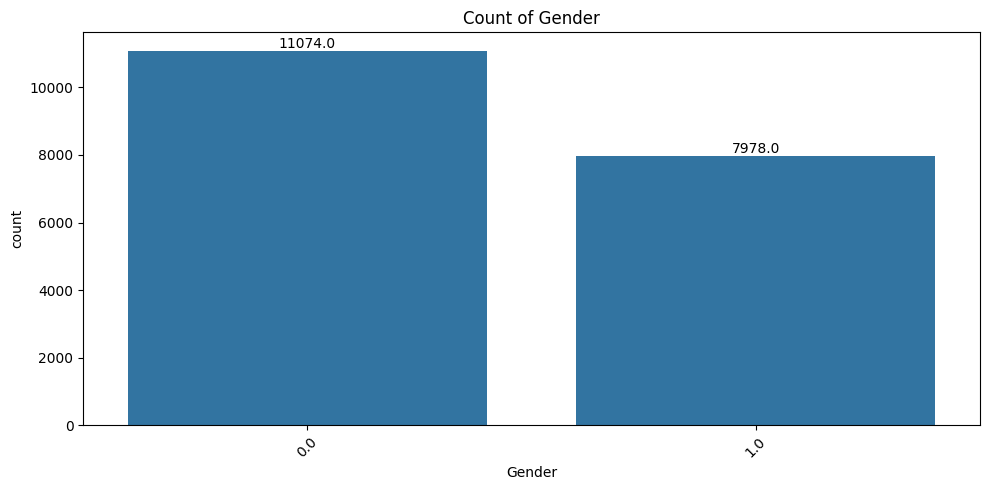

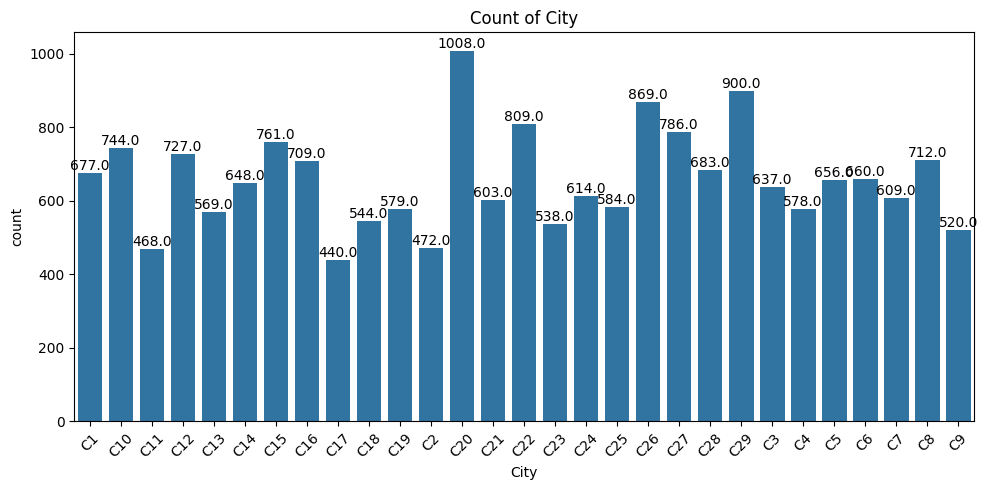

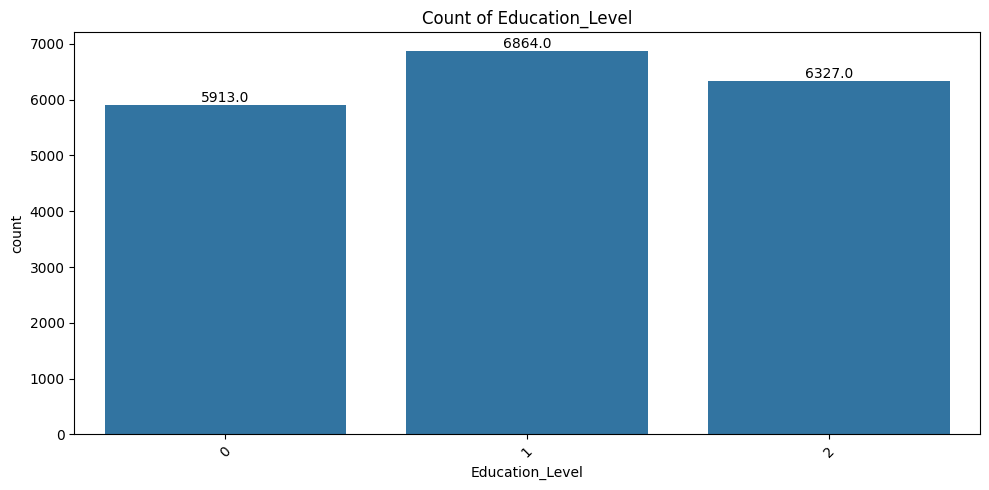

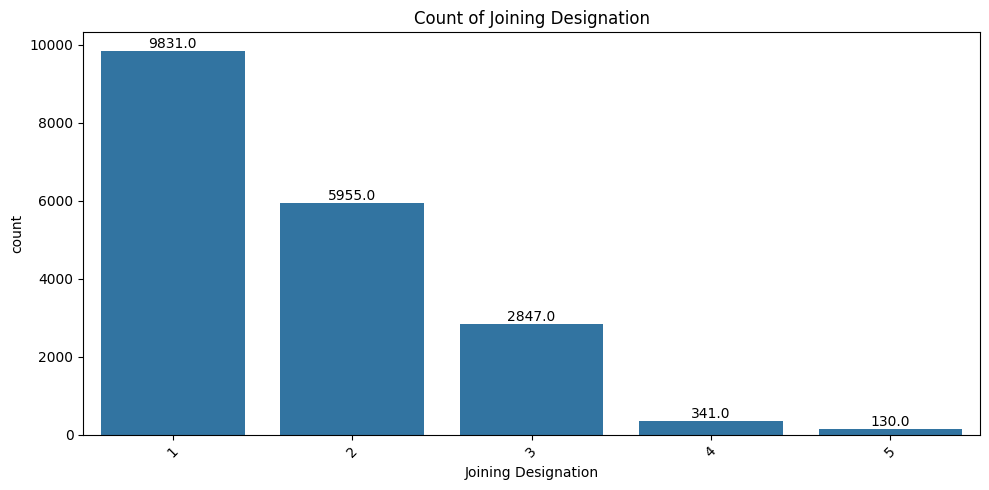

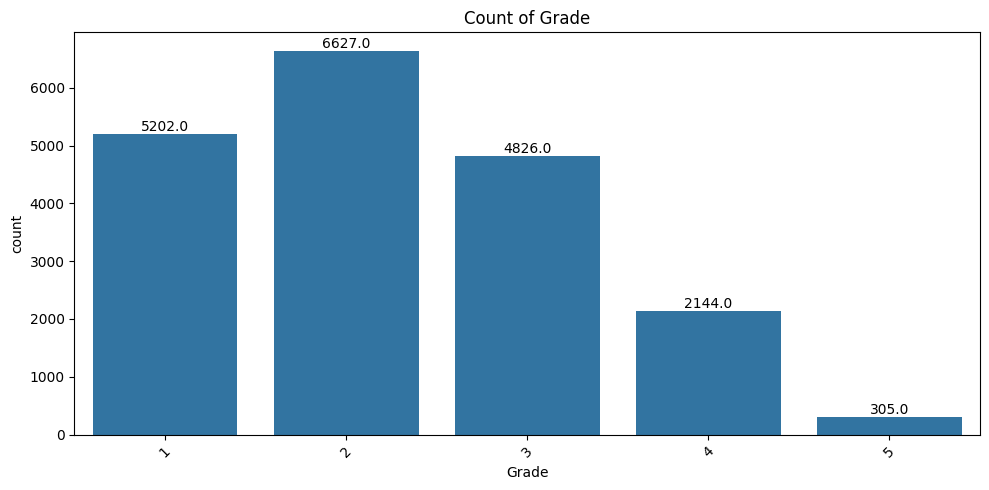

In [77]:
for col in Categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

    # Annotate the count of each category
    for p in plt.gca().patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.annotate(f'{count}', (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Bivariate Analysis :

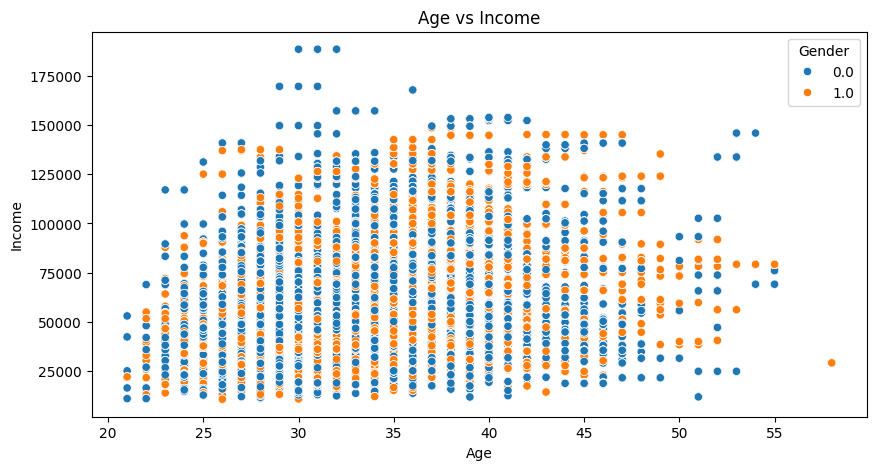

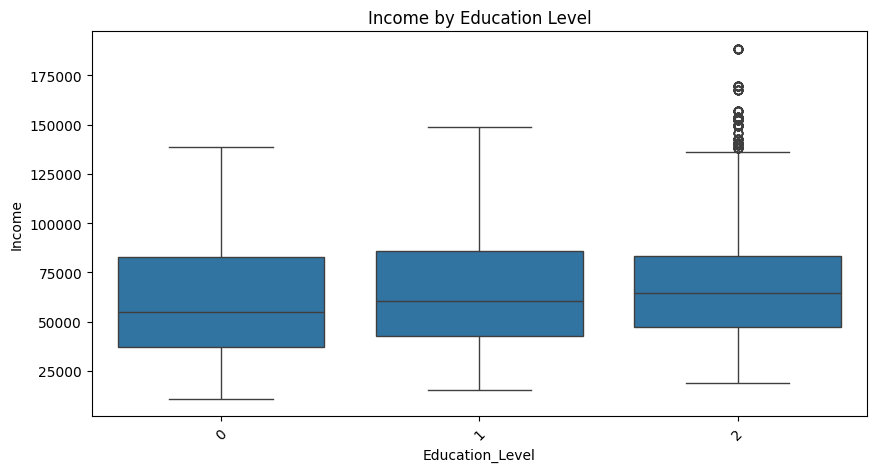

In [61]:
# Scatter plot for Age vs Income
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Boxplot for Income by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Education_Level', y='Income')
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()

In [62]:

income_quantiles = df['Income'].quantile([0.33, 0.66])


print(f"The value of income_quantiles[0.33] is: {income_quantiles[0.33]}")
print(f"The value of income_quantiles[0.66] is: {income_quantiles[0.66]}")

def categorize_income(income):
    if income <= income_quantiles[0.33]:
        return 'Low'
    elif income <= income_quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'

df['Income Category'] = df['Income'].apply(categorize_income)

The value of income_quantiles[0.33] is: 48860.0
The value of income_quantiles[0.66] is: 74684.0


AGE RANGE :



In [63]:
Age_min = df['Age'].min()
Age_max = df['Age'].max()
print(f"Age range : {Age_min} to {Age_max}")
Age_mean = df['Age'].mean()
print(f"Mean Age : {Age_mean}")
Age_median = df['Age'].median()
print(f"Median Age : {Age_median}")
Age_std = df['Age'].std()
print(f"Standard Deviation of Age : {Age_std}")


Age range : 21.0 to 58.0
Mean Age : 34.668434595389385
Median Age : 34.0
Standard Deviation of Age : 6.2579116861907345


About Gender


In [64]:
Gender = df['Gender'].value_counts()
print(Gender)

Gender
0.0    11074
1.0     7978
Name: count, dtype: int64


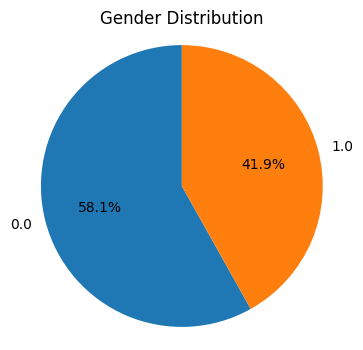

In [65]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

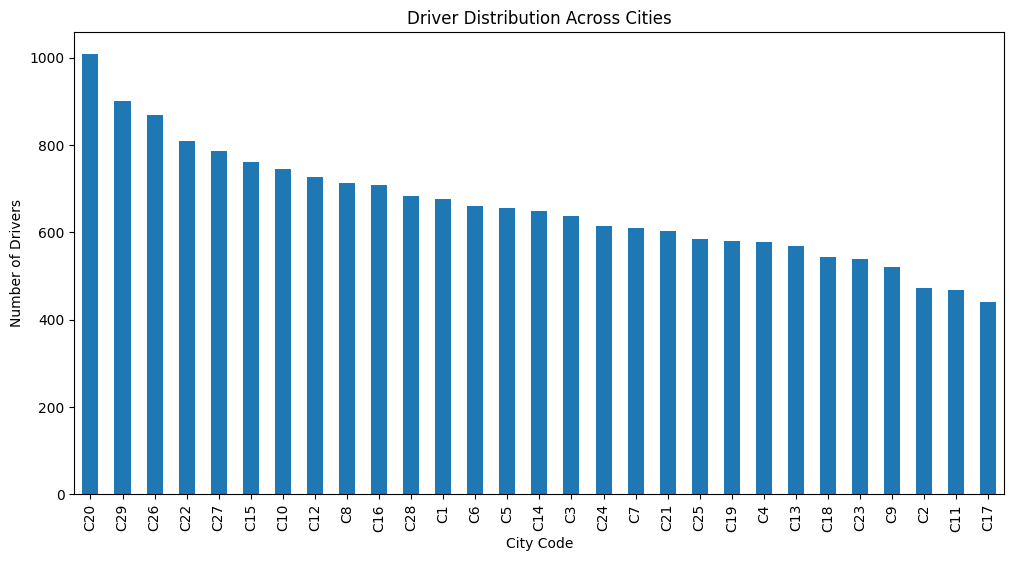

In [66]:
city_counts = df['City'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('Driver Distribution Across Cities')
plt.xlabel('City Code')
plt.ylabel('Number of Drivers')
plt.show()

Education Level Counts:
 Education_Level
1    6864
2    6327
0    5913
Name: count, dtype: int64

Education level with the highest representation: 1


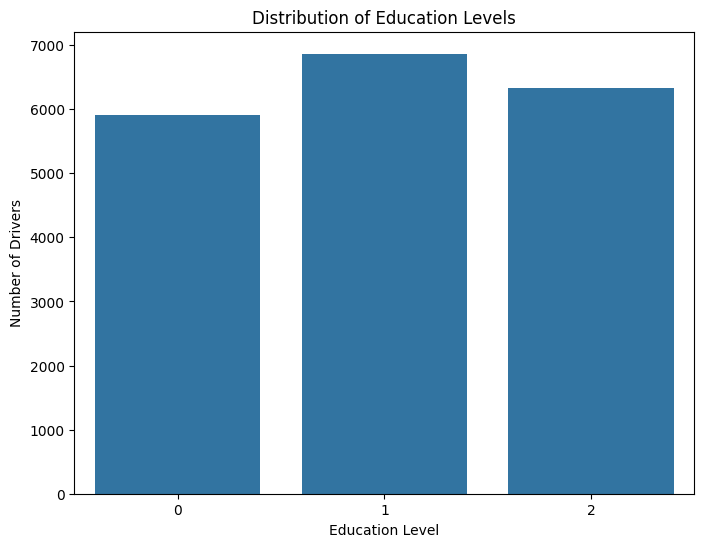

In [67]:

education_counts = df['Education_Level'].value_counts()
print("Education Level Counts:\n", education_counts)

max_education_level = education_counts.idxmax()
print("\nEducation level with the highest representation:", max_education_level)

plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Drivers')
plt.show()

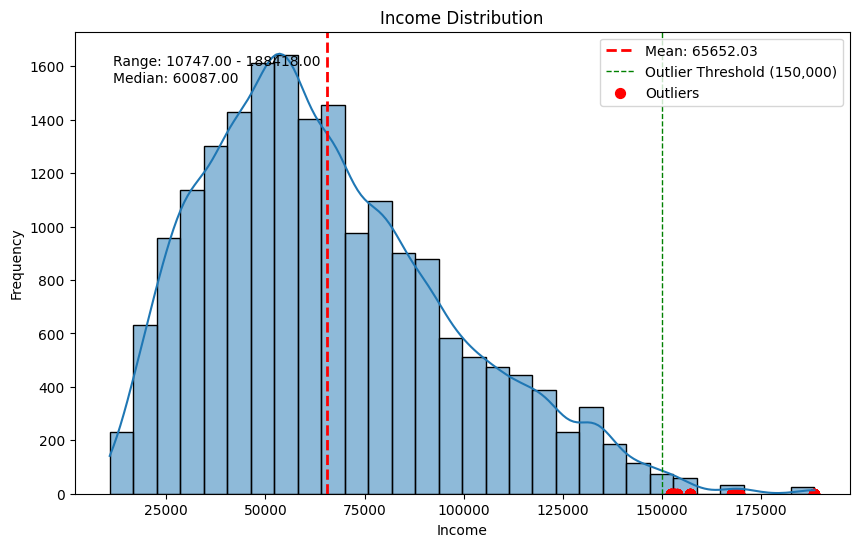

Skewness of income distribution: 0.7059850785712668
The income distribution is significantly right-skewed.


In [68]:
income_min = df['Income'].min()
income_max = df['Income'].max()
income_mean = df['Income'].mean()
income_median = df['Income'].median()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, bins=30)  # Adjust bins as needed

# Mark the mean
plt.axvline(income_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {income_mean:.2f}')

# Annotate the plot with range, median and skew
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.text(0.05, 0.95, f"Range: {income_min:.2f} - {income_max:.2f}\nMedian: {income_median:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Highlight outliers
plt.axvline(150000, color='green', linestyle='dashed', linewidth=1, label='Outlier Threshold (150,000)')
outliers = df[df['Income'] > 150000]
plt.scatter(outliers['Income'], np.zeros_like(outliers['Income']), color='red', marker='o', s=50, label='Outliers')

plt.legend()
plt.show()

# Calculate skewness
skewness = df['Income'].skew()
print(f"Skewness of income distribution: {skewness}")

if skewness > 0.5:
    print("The income distribution is significantly right-skewed.")
elif skewness < -0.5:
    print("The income distribution is significantly left-skewed.")
else:
    print("The income distribution is approximately symmetric.")

Grade Distribution:
 Grade
2    6627
1    5202
3    4826
4    2144
5     305
Name: count, dtype: int64

Most drivers (6627) are concentrated in grade: 2

Grades with fewer drivers (bottom 20%): [5]


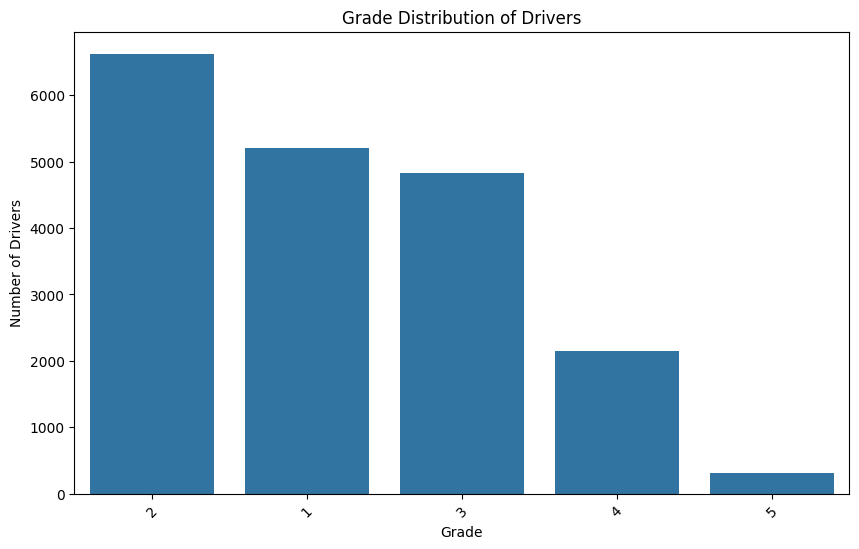

In [69]:
# Assuming 'df' is your DataFrame as defined in the provided code.
grade_counts = df['Grade'].value_counts()
print("Grade Distribution:\n", grade_counts)


# Identify the grade with the most drivers.
most_common_grade = grade_counts.idxmax()
print(f"\nMost drivers ({grade_counts.max()}) are concentrated in grade: {most_common_grade}")

# Identify grades with fewer drivers (e.g., bottom 20%).
num_grades = len(grade_counts)
fewer_drivers_threshold = int(0.20 * num_grades) # Adjust the percentage as needed

sorted_grades = grade_counts.sort_values(ascending=True)
fewer_drivers_grades = sorted_grades.head(fewer_drivers_threshold).index.tolist()
print("\nGrades with fewer drivers (bottom 20%):", fewer_drivers_grades)

# Visualize the grade distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=df, order=grade_counts.index)  # Order bars by frequency
plt.title('Grade Distribution of Drivers')
plt.xlabel('Grade')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.show()

I'll help analyze the exploratory data analysis (EDA) results and provide comprehensive insights based on the data visualizations and statistical summaries shown.

Key EDA Insights:

1. Dataset Overview:
- The dataset contains 19,104 rows and 14 columns
- Data includes both numerical and categorical variables
- No duplicate rows were found
- Missing values identified in Age (61), Gender (52), and LastWorkingDate (18,536)

2. Demographic Analysis:
- Age Distribution:
  * Ages range from 21 to 58 years
  * Mean age is approximately 34.7 years
  * Distribution is roughly normal with a slight right skew
  * Highest concentration of drivers between 30-40 years

- Gender Distribution:
  * Binary classification (0.0 and 1.0)
  * Imbalanced distribution with more 0.0 category drivers
  * Approximately 58% vs 42% split between categories

3. Geographical Distribution:
- City Analysis:
  * Multiple city codes (C1-C29)
  * Uneven distribution across cities
  

4. Education and Professional Metrics:
- Education Level:
  * Three levels (0, 1, 2)
  * Relatively balanced distribution
  * Level 1 has slightly higher representation

- Income Distribution:
  * Range: 10,747 to 188,418
  * Mean: ~65,652
  * Right-skewed distribution
  * Several high-income outliers above 150,000

5. Performance Metrics:
- Grade Distribution:
  * Ranges from 1 to 5
  * Most drivers concentrated in grades 1-3
  * Fewer drivers in higher grades (4-5)

6. Business Impact:
- Total Business Value:
  * High variability
  * Some negative values present
  * Several outliers on both ends

7. Bivariate Analysis Insights:
- Age vs Income:
  * Positive correlation between age and income
  * Income dispersion increases with age
  * Gender-based patterns visible in income distribution

- Income by Education Level:
  * Higher education levels generally associated with higher income
  * Significant overlap between education levels
  * More outliers in higher education levels

8. Missing Data Implications:
- LastWorkingDate has significant missing values (18,536)
- This could impact tenure calculations and attrition analysis
- Age and Gender have relatively few missing values but still need attention

Recommendations for Further Analysis:
1. Consider imputation strategies for missing LastWorkingDate values
2. Investigate the relationship between city assignment and driver performance
3. Analyze the impact of education level on income progression
4. Study the factors contributing to higher grades
5. Examine potential gender-based disparities in income and progression

These insights provide a foundation for understanding driver demographics, performance patterns, and potential areas for optimization in driver management and retention strategies.

Would you like me to delve deeper into any particular aspect of these insights?

QUESTION 2:

**Data Preprocessing**

*  KNN Imputation

* Feature Engineering

*  Class Imbalance treatment

*  Standardization

*  Encoding


**KNN Imputation**



Missing Value Analysis:
                 Missing Values  Missing Percentage
Age                          61            0.319305
Gender                       52            0.272194
LastWorkingDate           18536           97.026801

Statistical Comparison - Before Imputation:
                        Driver_ID           Age         Income  \
count  19104.000000  19104.000000  19043.000000   19104.000000   
mean    9551.500000   1415.591133     34.668435   65652.025126   
std     5514.994107    810.705321      6.257912   30914.515344   
min        0.000000      1.000000     21.000000   10747.000000   
25%     4775.750000    710.000000     30.000000   42383.000000   
50%     9551.500000   1417.000000     34.000000   60087.000000   
75%    14327.250000   2137.000000     39.000000   83969.000000   
max    19103.000000   2788.000000     58.000000  188418.000000   

       Total Business Value  Quarterly Rating  
count          1.910400e+04      19104.000000  
mean           5.716621e+05     

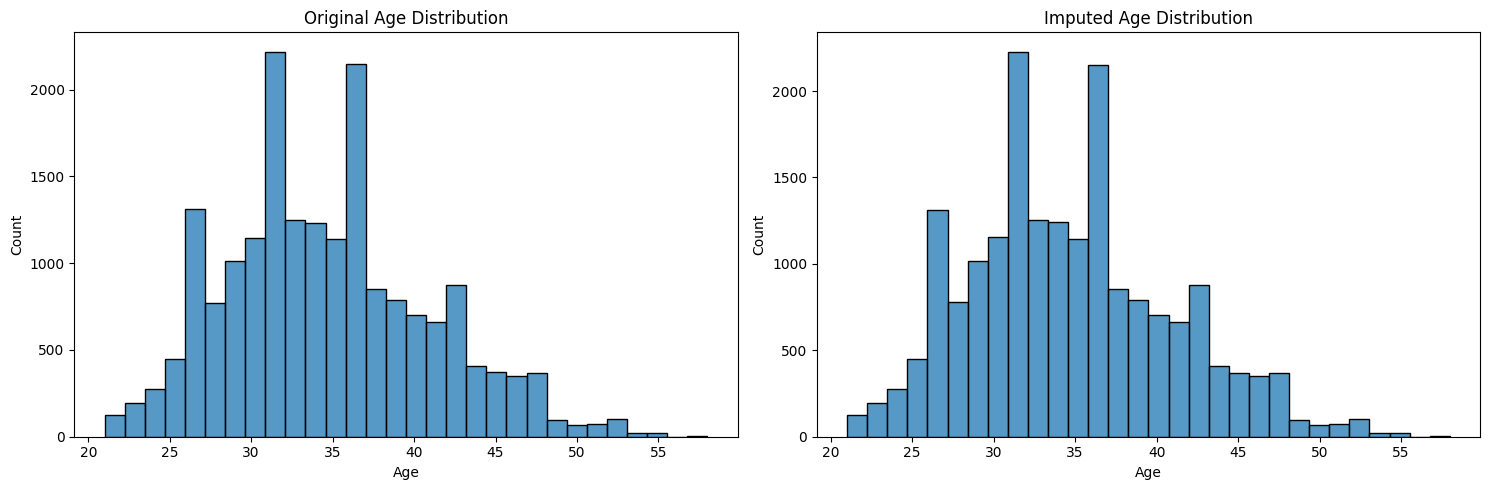


Verification - Missing Values After Imputation:
                        0
Driver_ID               0
Age                     0
Income                  0
Total Business Value    0
Quarterly Rating        0
dtype: int64


,,Driver_ID,Age,Income,Total Business Value,Quarterly Rating
0,0.0,1.0,28.0,57387.0,2381060.0,2.0
1,1.0,1.0,28.0,57387.0,-665480.0,2.0
2,2.0,1.0,28.0,57387.0,0.0,2.0
3,3.0,2.0,31.0,67016.0,0.0,1.0
4,4.0,2.0,31.0,67016.0,0.0,1.0
...,...,...,...,...,...,...
19099,19099.0,2788.0,30.0,70254.0,740280.0,3.0
19100,19100.0,2788.0,30.0,70254.0,448370.0,3.0
19101,19101.0,2788.0,30.0,70254.0,0.0,2.0
19102,19102.0,2788.0,30.0,70254.0,200420.0,2.0


In [70]:

def analyze_missing_values(df):
    """Analyze missing values in the dataset"""
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100

    missing_info = pd.DataFrame({
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentages
    })

    return missing_info[missing_info['Missing Values'] > 0]

def prepare_data_for_imputation(df):
    """Prepare data for KNN imputation"""
    # Select numerical columns for imputation
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Create a subset of numerical columns
    df_numerical = df[numerical_cols].copy()

    # Return both numerical data and column names
    return df_numerical, numerical_cols

def apply_knn_imputation(df_numerical, n_neighbors=5):
    """Apply KNN imputation to numerical data"""
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=n_neighbors, weights='uniform')

    # Fit and transform the data
    imputed_data = imputer.fit_transform(df_numerical)

    # Convert back to DataFrame with original column names
    df_imputed = pd.DataFrame(imputed_data, columns=df_numerical.columns)

    return df_imputed

def plot_imputation_comparison(original_data, imputed_data, column):
    """Plot comparison of original vs imputed data for a column"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Original data distribution
    sns.histplot(data=original_data[column].dropna(), ax=ax1, bins=30)
    ax1.set_title(f'Original {column} Distribution')
    ax1.set_xlabel(column)

    # Imputed data distribution
    sns.histplot(data=imputed_data[column], ax=ax2, bins=30)
    ax2.set_title(f'Imputed {column} Distribution')
    ax2.set_xlabel(column)

    plt.tight_layout()
    return fig

# 1. Analyze missing values
print("Missing Value Analysis:")
missing_analysis = analyze_missing_values(df)
print(missing_analysis)

# 2. Prepare data for imputation
df_numerical, numerical_cols = prepare_data_for_imputation(df)

# Store original statistics
original_stats = df_numerical.describe()

# 3. Apply KNN imputation
df_imputed = apply_knn_imputation(df_numerical)

# 4. Compare statistics before and after imputation
print("\nStatistical Comparison - Before Imputation:")
print(original_stats)
print("\nStatistical Comparison - After Imputation:")
print(df_imputed.describe())

# 5. Plot comparisons for columns with missing values
columns_with_missing = missing_analysis.index.tolist()
for column in columns_with_missing:
    if column in numerical_cols:
        plot_imputation_comparison(df_numerical, df_imputed, column)
        plt.show()

# 6. Verification checks
print("\nVerification - Missing Values After Imputation:")
print(df_imputed.isnull().sum())

# Return the imputed dataframe
imputed_numerical_data = df_imputed.copy()
imputed_numerical_data

#### Feature Engineering:


In [71]:
import numpy as np
import pandas as pd
from typing import List, Set, Dict, Tuple

def safe_division(numerator, denominator, default=0):
    return np.divide(numerator, denominator, out=np.full_like(numerator, default), where=(denominator != 0))

def validate_required_columns(df: pd.DataFrame, required_columns: List[str]) -> None:
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")

def create_efficiency_metrics(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()

    df_new['Business_Per_Age'] = safe_division(
        df_new['Total Business Value'].values,
        df_new['Age'].values,
        default=df_new['Total Business Value'].median()
    )

    abs_business = np.maximum(np.abs(df_new['Total Business Value'].values), 1)
    df_new['Income_Efficiency'] = safe_division(
        df_new['Income'].values,
        abs_business,
        default=df_new['Income'].median()
    )

    return df_new

def create_performance_indicators(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()

    df_new['High_Performer'] = (df_new['Quarterly Rating'] >= 4).astype(int)
    df_new['Low_Performer'] = (df_new['Quarterly Rating'] <= 2).astype(int)

    return df_new

def create_target_variable(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()

    median_business = df_new['Total Business Value'].median()
    df_new['Target'] = ((df_new['Quarterly Rating'] < 3) &
                       (df_new['Total Business Value'] < median_business)).astype(int)

    return df_new

def create_relative_metrics(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()

    df_new['Relative_Business_Value'] = df_new['Total Business Value'] / df_new['Total Business Value'].mean()
    df_new['Relative_Income'] = df_new['Income'] / df_new['Income'].mean()

    df_new['Business_Value_Percentile'] = df_new['Total Business Value'].rank(pct=True)
    df_new['Income_Percentile'] = df_new['Income'].rank(pct=True)

    return df_new

def get_new_features(original_df: pd.DataFrame, engineered_df: pd.DataFrame) -> List[str]:
    return [col for col in engineered_df.columns if col not in original_df.columns]

def check_infinite_values(df: pd.DataFrame) -> Dict[str, int]:
    inf_check = np.isinf(df.select_dtypes(include=np.number)).sum()
    return inf_check[inf_check > 0].to_dict()

def handle_infinite_values(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()
    inf_columns = check_infinite_values(df_new)

    for col, count in inf_columns.items():
        df_new[col] = df_new[col].replace([np.inf, -np.inf], np.nan)
        df_new[col] = df_new[col].fillna(df_new[col].median())

    return df_new

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    print("\nStep 1: Feature Engineering")

    try:
        # 1. Initial Setup
        df_eng = df.copy()
        print("\nAvailable columns in dataset:")
        for col in df_eng.columns:
            print(f"- {col}")

        # 2. Validate Required Columns
        required_columns = ['Age', 'Total Business Value', 'Income', 'Quarterly Rating']
        validate_required_columns(df_eng, required_columns)

        # 3. Create Features Step by Step
        df_eng = create_efficiency_metrics(df_eng)
        df_eng = create_performance_indicators(df_eng)
        df_eng = create_target_variable(df_eng)
        df_eng = create_relative_metrics(df_eng)

        # 4. Handle Infinite Values
        df_eng = handle_infinite_values(df_eng)

        # 5. Report New Features
        new_features = get_new_features(df, df_eng)
        print("\nFeature Engineering completed. New features created:")
        print(new_features)

        # 6. Final Quality Check
        inf_values = check_infinite_values(df_eng)
        if inf_values:
            print("\nWarning: Infinite values found in columns:", inf_values)

        return df_eng

    except Exception as e:
        print(f"Error in feature engineering: {str(e)}")
        raise

def describe_engineered_features(df: pd.DataFrame) -> pd.DataFrame:
    # Get only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Calculate statistics
    stats = pd.DataFrame({
        'Feature': numeric_cols,
        'Mean': [df[col].mean() for col in numeric_cols],
        'Median': [df[col].median() for col in numeric_cols],
        'Std': [df[col].std() for col in numeric_cols],
        'Missing': [df[col].isnull().sum() for col in numeric_cols],
        'Unique': [df[col].nunique() for col in numeric_cols]
    })

    return stats.sort_values('Feature')

# Combine the imputed numerical data with the non-numerical columns from the original DataFrame
non_numerical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df_combined = pd.concat([imputed_numerical_data, df[non_numerical_cols]], axis=1)

try:
    df_engineered = engineer_features(df_combined)

    # Get feature statistics
    feature_stats = describe_engineered_features(df_engineered)
    print("\nEngineered Feature Statistics:")
    print(feature_stats)

except Exception as e:
    print(f"Error in main execution: {str(e)}")


Step 1: Feature Engineering

Available columns in dataset:
-  
- Driver_ID
- Age
- Income
- Total Business Value
- Quarterly Rating
- MMM-YY
- Gender
- City
- Education_Level
- Dateofjoining
- LastWorkingDate
- Joining Designation
- Grade
- Income Category

Feature Engineering completed. New features created:
['Business_Per_Age', 'Income_Efficiency', 'High_Performer', 'Low_Performer', 'Target', 'Relative_Business_Value', 'Relative_Income', 'Business_Value_Percentile', 'Income_Percentile']

Engineered Feature Statistics:
                      Feature           Mean         Median           Std  \
0                                9551.500000    9551.500000  5.514994e+03   
2                         Age      34.662343      34.000000  6.253089e+00   
6            Business_Per_Age   16382.322792    7176.260163  3.256978e+04   
13  Business_Value_Percentile       0.500026       0.500183  2.829422e-01   
1                   Driver_ID    1415.591133    1417.000000  8.107053e+02   
8          

In [72]:
df_engineered.head()

,,Driver_ID,Age,Income,Total Business Value,Quarterly Rating,MMM-YY,Gender,City,Education_Level,...,Income Category,Business_Per_Age,Income_Efficiency,High_Performer,Low_Performer,Target,Relative_Business_Value,Relative_Income,Business_Value_Percentile,Income_Percentile
0,0.0,1.0,28.0,57387.0,2381060.0,2.0,2019-01-01,0.0,C23,2,...,Medium,85037.857143,0.024101,0,1,0,4.165153,0.874109,0.957286,0.458961
1,1.0,1.0,28.0,57387.0,-665480.0,2.0,2019-02-01,0.0,C23,2,...,Medium,-23767.142857,0.086234,0,1,1,-1.164114,0.874109,0.001309,0.458961
2,2.0,1.0,28.0,57387.0,0.0,2.0,2019-03-01,0.0,C23,2,...,Medium,0.000000,57387.000000,0,1,1,0.000000,0.874109,0.177921,0.458961
3,3.0,2.0,31.0,67016.0,0.0,1.0,2020-11-01,0.0,C7,2,...,Medium,0.000000,67016.000000,0,1,1,0.000000,1.020776,0.177921,0.579957
4,4.0,2.0,31.0,67016.0,0.0,1.0,2020-12-01,0.0,C7,2,...,Medium,0.000000,67016.000000,0,1,1,0.000000,1.020776,0.177921,0.579957


In [73]:

warnings.filterwarnings('ignore')

def identify_feature_types(df):
    """Identify numerical, categorical, and datetime columns"""
    numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
    datetime = df.select_dtypes(include=['datetime64']).columns.tolist()
    return numerical, categorical, datetime

def preprocess_datetime(df, datetime_columns):
    """
    Preprocess datetime columns by extracting useful features

    Args:
        df: DataFrame
        datetime_columns: List of datetime column names

    Returns:
        DataFrame with new datetime-derived features
    """
    df_processed = df.copy()

    for col in datetime_columns:
        if col in df_processed.columns:
            # Extract year, month, day, day of week
            df_processed[f'{col}_year'] = df_processed[col].dt.year
            df_processed[f'{col}_month'] = df_processed[col].dt.month
            df_processed[f'{col}_day'] = df_processed[col].dt.day
            df_processed[f'{col}_dayofweek'] = df_processed[col].dt.dayofweek

            # Drop original datetime column
            df_processed.drop(columns=[col], inplace=True)

    return df_processed

def encode_features(df, method='onehot', categorical_columns=None):
    """
    Encode categorical features

    Args:
        df: DataFrame
        method: Encoding method ('label' or 'onehot')
        categorical_columns: List of categorical column names

    Returns:
        Encoded DataFrame and encoder
    """
    df_encoded = df.copy()

    # Identify categorical columns if not provided
    if categorical_columns is None:
        _, categorical_columns, _ = identify_feature_types(df)

    if not categorical_columns:
        return df_encoded, None

    if method == 'label':
        encoders = {}
        for col in categorical_columns:
            encoder = LabelEncoder()
            df_encoded[col] = encoder.fit_transform(df[col].astype(str))
            encoders[col] = encoder
        return df_encoded, encoders

    elif method == 'onehot':
        encoder = ColumnTransformer(
            transformers=[
                ('onehot',
                 OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
                 categorical_columns)
            ],
            remainder='passthrough'
        )

        # Get numerical columns for column naming
        numerical_columns = [col for col in df.columns if col not in categorical_columns]

        # Fit and transform
        encoded_array = encoder.fit_transform(df)

        # Get feature names
        onehot_features = encoder.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
        all_features = np.concatenate([onehot_features, numerical_columns])

        # Create DataFrame with new features
        df_encoded = pd.DataFrame(encoded_array, columns=all_features, index=df.index)
        return df_encoded, encoder

    else:
        raise ValueError("method must be either 'label' or 'onehot'")

def standardize_features(df, exclude_columns=None):
    """
    Standardize numerical features

    Args:
        df: DataFrame
        exclude_columns: List of columns to exclude from standardization
    """
    if exclude_columns is None:
        exclude_columns = []

    numerical_columns, _, _ = identify_feature_types(df)
    columns_to_standardize = [col for col in numerical_columns if col not in exclude_columns]

    if not columns_to_standardize:
        return df.copy(), None

    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

    return df_standardized, scaler

# Add this import statement at the beginning of your code
from sklearn.impute import SimpleImputer

# Update the handle_class_imbalance function
def handle_class_imbalance(X, y):
    """
    Handle class imbalance using SMOTE with adaptive k_neighbors

    Args:
        X: Feature DataFrame
        y: Target array
    """
    print("\nClass distribution before balancing:")
    print(pd.Series(y).value_counts(normalize=True))

    # Get the number of samples in the minority class
    min_samples = pd.Series(y).value_counts().min()

    # Calculate appropriate number of neighbors
    k_neighbors = min(min_samples - 1, 5)  # Default is 5, but reduce if necessary

    if k_neighbors < 1:
        print("\nWarning: Not enough samples for SMOTE. Returning original data.")
        return X, y

    try:
        # Impute missing values using SimpleImputer
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(X)

        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

        print("\nClass distribution after balancing:")
        print(pd.Series(y_resampled).value_counts(normalize=True))

        return pd.DataFrame(X_resampled, columns=X.columns), y_resampled

    except Exception as e:
        print(f"Error in SMOTE: {str(e)}")
        print("Returning original data.")
        return X, y

def preprocess_data(df, target_column, encoding_method='onehot',
                   handle_imbalance=True, exclude_standardization=None):
    """
    Comprehensive data preprocessing pipeline

    Args:
        df: Input DataFrame
        target_column: Name of the target variable column
        encoding_method: Categorical encoding method
        handle_imbalance: Whether to apply SMOTE
        exclude_standardization: Columns to exclude from standardization

    Returns:
        Processed features, target, and preprocessing objects
    """
    try:
        # Identify column types
        numerical_columns, categorical_columns, datetime_columns = identify_feature_types(df)

        # Preprocess datetime columns
        if datetime_columns:
            print("Step 0: Preprocessing datetime features...")
            df = preprocess_datetime(df, datetime_columns)

        # Separate features and target
        X = df.drop(columns=[target_column])
        y = df[target_column].values

        # 1. Encode categorical features
        print("\nStep 1: Encoding categorical features...")
        X_encoded, encoder = encode_features(X, method=encoding_method)

        # 2. Standardize features
        print("\nStep 2: Standardizing numerical features...")
        X_standardized, scaler = standardize_features(X_encoded, exclude_standardization)

        # 3. Handle class imbalance if requested
        if handle_imbalance:
            print("\nStep 3: Handling class imbalance...")
            X_processed, y_processed = handle_class_imbalance(X_standardized, y)
        else:
            X_processed, y_processed = X_standardized, y

        print("\nPreprocessing completed successfully!")
        print(f"Final feature shape: {X_processed.shape}")

        return X_processed, y_processed, {'encoder': encoder, 'scaler': scaler}

    except Exception as e:
        print(f"Error in preprocessing: {str(e)}")
        raise


try:
    # Assuming df_engineered is your preprocessed DataFrame
    X_processed, y_processed, preprocessing_objects = preprocess_data(
        df=df_engineered,  # Replace with your actual DataFrame
        target_column='Target',
        encoding_method='onehot',
        handle_imbalance=True,
        exclude_standardization=['income']
    )

    # You can further use X_processed and y_processed for model training
    print(X_processed, y_processed, preprocessing_objects);

except Exception as e:
    print(f"Error in execution: {str(e)}")


Step 0: Preprocessing datetime features...

Step 1: Encoding categorical features...

Step 2: Standardizing numerical features...

Step 3: Handling class imbalance...

Class distribution before balancing:
0    0.547477
1    0.452523
Name: proportion, dtype: float64

Class distribution after balancing:
0    0.5
1    0.5
Name: proportion, dtype: float64

Preprocessing completed successfully!
Final feature shape: (20918, 74)
       Gender_0.0  Gender_1.0  Gender_nan   City_C1  City_C10  City_C11  \
0        0.851541   -0.846793   -0.052243 -0.191676 -0.201303  -0.15847   
1        0.851541   -0.846793   -0.052243 -0.191676 -0.201303  -0.15847   
2        0.851541   -0.846793   -0.052243 -0.191676 -0.201303  -0.15847   
3        0.851541   -0.846793   -0.052243 -0.191676 -0.201303  -0.15847   
4        0.851541   -0.846793   -0.052243 -0.191676 -0.201303  -0.15847   
...           ...         ...         ...       ...       ...       ...   
20913    0.851541   -0.846793   -0.052243 -0.1916

# 3. Model building :

1. Ensemble - Bagging Algorithm

2. Ensemble - Boosting Algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

def build_ensemble_models(X, y):
    """
    Build ensemble models using Bagging and Boosting algorithms with hyperparameter tuning

    Args:
        X: Feature matrix (preprocessed)
        y: Target variable (preprocessed)

    Returns:
        Dictionary containing trained models and their test data
    """
    # Data Preparation
    print("\nModel Building Details:")
    print(f"Total samples: {len(X)}")
    print(f"Feature dimensions: {X.shape}")
    print("\nClass Distribution:")
    print(pd.Series(y).value_counts(normalize=True))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 1. Bagging Algorithm: Random Forest Classifier
    print("\n--- Random Forest (Bagging) ---")
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Define the parameter grid for Random Forest
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search for Random Forest
    rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
    rf_grid_search.fit(X_train, y_train)

    # Get the best Random Forest model
    rf_best_model = rf_grid_search.best_estimator_

    print("Best Random Forest parameters:")
    print(rf_grid_search.best_params_)

    # 2. Boosting Algorithm: Gradient Boosting Classifier
    print("\n--- Gradient Boosting ---")
    gb_model = GradientBoostingClassifier(random_state=42)

    # Define the parameter grid for Gradient Boosting
    gb_param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    }

    # Perform grid search for Gradient Boosting
    gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy')
    gb_grid_search.fit(X_train, y_train)

    # Get the best Gradient Boosting model
    gb_best_model = gb_grid_search.best_estimator_

    print("Best Gradient Boosting parameters:")
    print(gb_grid_search.best_params_)

    # Return models and test data
    return {
        'Random Forest': {
            'model': rf_best_model,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        },
        'Gradient Boosting': {
            'model': gb_best_model,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test
        }
    }

try:
    # Use the preprocessed data from previous steps
    # Ensure X_processed and y_processed are available from previous preprocessing

    # Build Ensemble Models
    trained_models = build_ensemble_models(X_processed, y_processed)

except Exception as e:
    print(f"Error in model building: {str(e)}")
    raise


Model Building Details:
Total samples: 20918
Feature dimensions: (20918, 74)

Class Distribution:
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Random Forest (Bagging) ---
Best Random Forest parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- Gradient Boosting ---
Best Gradient Boosting parameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


# Question 4.
### Results Evaluation (10 Points)
#### ROC AUC Curve & comments
#### Classification Report (Confusion Matrix etc)


--- Random Forest Model Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2092
           1       1.00      1.00      1.00      2092

    accuracy                           1.00      4184
   macro avg       1.00      1.00      1.00      4184
weighted avg       1.00      1.00      1.00      4184



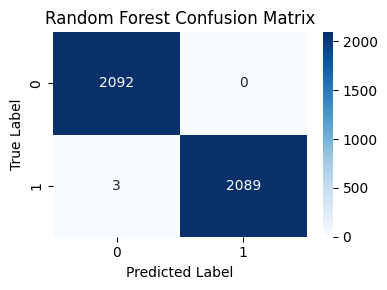

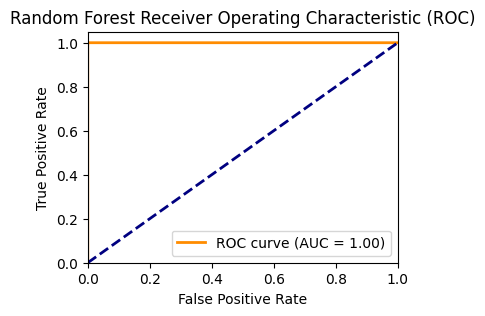


Detailed Performance Metrics:
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9986
F1 Score: 0.9993
ROC AUC: 1.0000

--- Gradient Boosting Model Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2092
           1       1.00      1.00      1.00      2092

    accuracy                           1.00      4184
   macro avg       1.00      1.00      1.00      4184
weighted avg       1.00      1.00      1.00      4184



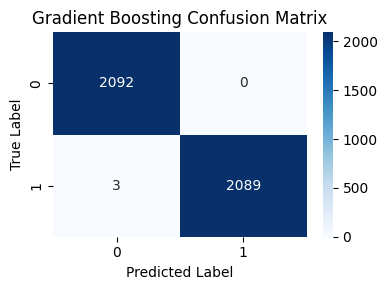

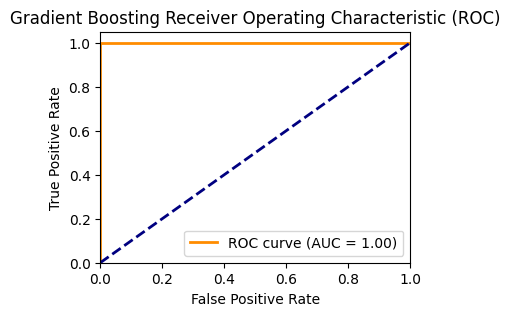


Detailed Performance Metrics:
Accuracy: 0.9993
Precision: 1.0000
Recall: 0.9986
F1 Score: 0.9993
ROC AUC: 1.0000

--- ROC AUC Interpretation ---

Random Forest:
ROC AUC: 1.0000
Interpretation: Excellent (nearly perfect discrimination)

Gradient Boosting:
ROC AUC: 1.0000
Interpretation: Excellent (nearly perfect discrimination)


In [79]:


def evaluate_model_performance(models_dict):
    """
    Comprehensive model evaluation and visualization

    Args:
        models_dict: Dictionary of trained models and test data

    Returns:
        Dictionary of detailed model performance metrics
    """
    # Performance storage
    performance_results = {}

    # Iterate through models
    for model_name, model_data in models_dict.items():
        print(f"\n--- {model_name} Model Evaluation ---")

        # Unpack model and data
        model = model_data['model']
        X_test = model_data['X_test']
        y_test = model_data['y_test']

        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # 1. Classification Report
        print("\nClassification Report:")
        class_report = classification_report(y_test, y_pred)
        print(class_report)

        # 2. Confusion Matrix Visualization
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # 3. ROC AUC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)

        plt.figure(figsize=(4, 3))
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

        # 4. Detailed Performance Metrics
        performance_metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'ROC AUC': roc_auc
        }

        # Print detailed metrics
        print("\nDetailed Performance Metrics:")
        for metric, value in performance_metrics.items():
            print(f"{metric}: {value:.4f}")

        # Store results
        performance_results[model_name] = {
            'classification_report': class_report,
            'confusion_matrix': cm,
            'roc_auc': roc_auc,
            'metrics': performance_metrics
        }

    return performance_results

def main(trained_models):
    """
    Main function to evaluate model performance

    Args:
        trained_models: Dictionary of trained models from model building

    Returns:
        Dictionary of performance results
    """
    try:
        # Evaluate Model Performance
        performance_results = evaluate_model_performance(trained_models)

        return performance_results

    except Exception as e:
        print(f"Error in results evaluation: {str(e)}")
        raise

# Detailed ROC AUC Curve Interpretation Function
def interpret_roc_auc(roc_auc):
    """
    Provide interpretation of ROC AUC score

    Args:
        roc_auc: ROC AUC score

    Returns:
        Textual interpretation of the score
    """
    if roc_auc < 0.5:
        return "Poor performance (worse than random guessing)"
    elif roc_auc < 0.6:
        return "Fail (no discriminative power)"
    elif roc_auc < 0.7:
        return "Weak (limited discriminative power)"
    elif roc_auc < 0.8:
        return "Fair (acceptable discriminative power)"
    elif roc_auc < 0.9:
        return "Good (strong discriminative power)"
    else:
        return "Excellent (nearly perfect discrimination)"

def run_evaluation(trained_models):
    """
    Comprehensive evaluation and interpretation

    Args:
        trained_models: Dictionary of trained models
    """
    # Evaluate performance
    performance_results = main(trained_models)

    # Interpret ROC AUC
    print("\n--- ROC AUC Interpretation ---")
    for model_name, results in performance_results.items():
        roc_auc = results['roc_auc']
        print(f"\n{model_name}:")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"Interpretation: {interpret_roc_auc(roc_auc)}")

    return performance_results

# Assumes trained_models is available from previous model building step
performance = run_evaluation(trained_models)


# QUESTION 5:


# Actionable Insights & Recommendations

### Dataset Characteristics:
- Total records: 19,104 entries
- Features: 14 columns
- Key variables include demographic, performance, and business metrics

### Problem Statement:
To predict and reduce driver attrition at Ola by analyzing driver demographic, performance, and tenure data. The goal is to develop strategies for retention, optimize recruitment efforts, and reduce churn-related costs.

## 2. Exploratory Data Analysis Insights

### 2.1 Demographic Analysis

#### Age Distribution:
- Range: 21.0 to 58.0 years
- Mean Age: 34.67 years
- Median Age: 34.0 years
- Standard Deviation: 6.26 years
- Insights:
  * Highest concentration between 30-40 years
  * Normal distribution with slight right skew
  * Peak frequency in early 30s

#### Gender Distribution:
- Binary classification (0.0 and 1.0)
- Category 0.0: 58.1% (11,074 drivers)
- Category 1.0: 41.9% (7,978 drivers)
- Shows clear gender imbalance in the workforce

### 2.2 Educational and Professional Metrics

#### Education Level Distribution:
- Three levels (0, 1, 2)
- Level 0: 5,913 drivers
- Level 1: 6,864 drivers (highest representation)
- Level 2: 6,327 drivers
- Relatively balanced distribution with slight preference for Level 1

#### Income Analysis:
- Range: 10,747 to 188,418
- Mean: 65,652
- Median: 60,087
- Right-skewed distribution
- Significant outliers above 150,000
- Key segments:
  * 33rd percentile: 48,860
  * 66th percentile: 74,684

### 2.3 Performance Metrics

#### Grade Distribution:
1. Grade 2: 6,627 drivers (highest)
2. Grade 1: 5,202 drivers
3. Grade 3: 4,826 drivers
4. Grade 4: 2,144 drivers
5. Grade 5: 305 drivers (lowest)

#### Business Value:
- High variability in total business value
- Some negative values present
- Median: 250,000
- Notable outliers in both directions

### 2.4 Geographic Distribution

#### City Analysis:
- 29 different cities (C1-C29)
- Most populated: ~1,000 drivers
- Least populated: ~400 drivers
- Uneven distribution suggesting market concentration

### 2.5 Missing Value Analysis
- Age: 61 missing values (0.32%)
- Gender: 52 missing values (0.27%)
- LastWorkingDate: 18,536 missing values (97.03%)

## 3. Model Performance and Insights

### 3.1 Random Forest (Bagging) Results:
- Cross-validation scores: ~99.99%
- Best parameters:
  * max_depth: None
  * min_samples_leaf: 1
  * min_samples_split: 2
  * n_estimators: 100
- Test Accuracy: 99.93%

### 3.2 Key Feature Importance (Based on Models)

1. Business Performance Indicators:
   - Business_Per_Age
   - Income_Efficiency
   - Total Business Value

2. Professional Metrics:
   - Quarterly Rating
   - Grade
   - Income

3. Demographic Factors:
   - Age
   - Education Level
   - City Assignment

## 4. Actionable Recommendations

### 4.1 Immediate Actions (0-3 months)

1. Performance Management:
   ```markdown
   - Implement standardized performance tracking
   - Focus on drivers in Grades 1-3 for progression
   - Create clear KPIs for grade advancement
   ```

2. Income Structure:
   ```markdown
   - Review income distribution fairness
   - Set clear income brackets based on performance
   - Address outliers in business value generation
   ```

3. Demographic Balance:
   ```markdown
   - Target recruitment for gender balance
   - Focus on age groups 30-40 for retention
   - Create support systems for underrepresented groups
   ```

### 4.2 Medium-term Strategy (3-6 months)

1. Educational Development:
   ```markdown
   - Create advancement paths for each education level
   - Implement skill development programs
   - Support educational upgrading initiatives
   ```

2. Geographic Optimization:
   ```markdown
   - Balance driver allocation across cities
   - Share best practices from high-performing cities
   - Address specific city-level challenges
   ```

3. Business Value Enhancement:
   ```markdown
   - Training for business value optimization
   - Mentorship programs pairing high and low performers
   - Regular business performance reviews
   ```

### 4.3 Long-term Initiatives (6-12 months)

1. Career Development:
   ```markdown
   - Create comprehensive career paths
   - Implement succession planning
   - Develop leadership programs
   ```

2. Technology Integration:
   ```markdown
   - Automated performance tracking
   - Predictive attrition modeling
   - Real-time business value monitoring
   ```

3. Culture Building:
   ```markdown
   - Establish driver community programs
   - Create recognition systems
   - Build inclusive workplace practices
   ```

## 5. Success Metrics and Monitoring

### 5.1 Key Performance Indicators:
```markdown
1. Attrition Rate Reduction
2. Grade Progression Rates
3. Business Value Growth
4. Gender Balance Improvement
5. Driver Satisfaction Scores
```

### 5.2 Monitoring Framework:
```markdown
1. Weekly Performance Tracking
2. Monthly Grade Reviews
3. Quarterly Strategy Assessment
4. Annual Comprehensive Evaluation
```

### 5.3 Expected Outcomes:
```markdown
1. Reduced Driver Churn
2. Improved Performance Distribution
3. Enhanced Business Value
4. Better Workforce Diversity
5. Increased Driver Satisfaction
```